<a href="https://colab.research.google.com/github/2005lakshmipriya/HousePrice_prediction/blob/main/Project2_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Data Loaded Successfully")


Data Loaded Successfully


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

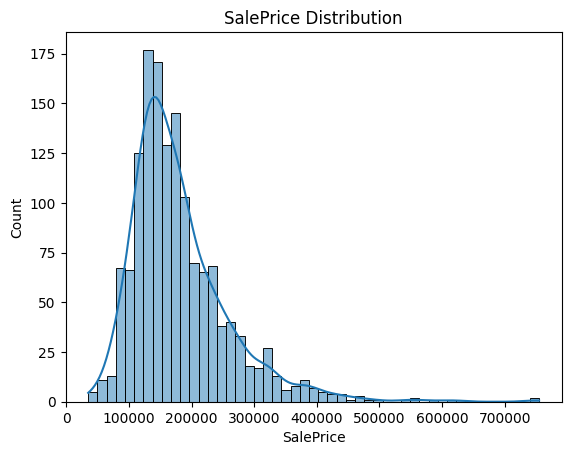

In [14]:
# Basic info and summary
print(train.info())
print(train.describe())

# Check missing values
print(train.isnull().sum().sort_values(ascending=False).head(20))

# Visualize target variable distribution
sns.histplot(train['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.show()


In [15]:
# Fill numeric missing values with median
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())

# Fill categorical missing values with 'None'
for col in ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

print("Missing values handled")


Missing values handled


In [16]:
# Create new feature 'HouseAge'
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
test['HouseAge'] = test['YrSold'] - test['YearBuilt']

print("Feature engineering done")


Feature engineering done


In [17]:
# One-hot encoding for categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Align train and test columns
train, test = train.align(test, join='left', axis=1, fill_value=0)

print("Categorical variables encoded")


Categorical variables encoded


In [18]:
# Log-transform target variable
train['SalePrice'] = np.log1p(train['SalePrice'])

# Prepare features and target
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

print("Target variable transformed and data prepared")


Target variable transformed and data prepared


In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and validation sets")


Data split into training and validation sets


In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model trained")


Model trained


In [21]:
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f'Validation RMSE: {rmse}')


Validation RMSE: 0.14814174903820132


In [31]:
# Make sure SalePrice is not in test
if 'SalePrice' in test.columns:
    test = test.drop('SalePrice', axis=1)

# Make sure columns in test match training features
# Assuming X is your training features DataFrame (train without 'SalePrice')
test = test[X.columns]

# Now predict
predictions = model.predict(test)
final_predictions = np.expm1(predictions)


In [32]:
# Prepare submission
submission = pd.DataFrame({
    'Id': test['Id'],  # Make sure 'Id' is still in test
    'SalePrice': final_predictions
})

submission.to_csv('submission.csv', index=False)
print("Submission file created")

Submission file created


# **Conclusion**:

* This project showcases a complete predictive modeling workflow to estimate house prices using Random Forest Regression.
* It covers data cleaning, feature engineering, model training, and evaluation with RMSE.
* A strong demonstration of practical machine learning skills for real-world regression problems.
